In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

<ipython-input-2-4a019c77e54b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Audio File': audio_file_path, 'Dominant Frequency (Hz)': dominant_frequency}, ignore_index=True)


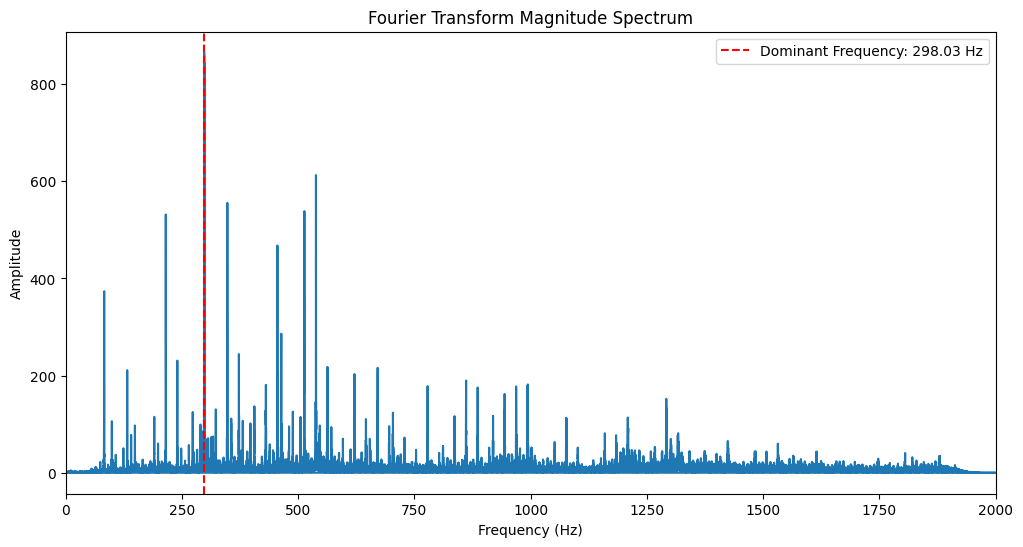

<ipython-input-2-4a019c77e54b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Audio File': audio_file_path, 'Dominant Frequency (Hz)': dominant_frequency}, ignore_index=True)


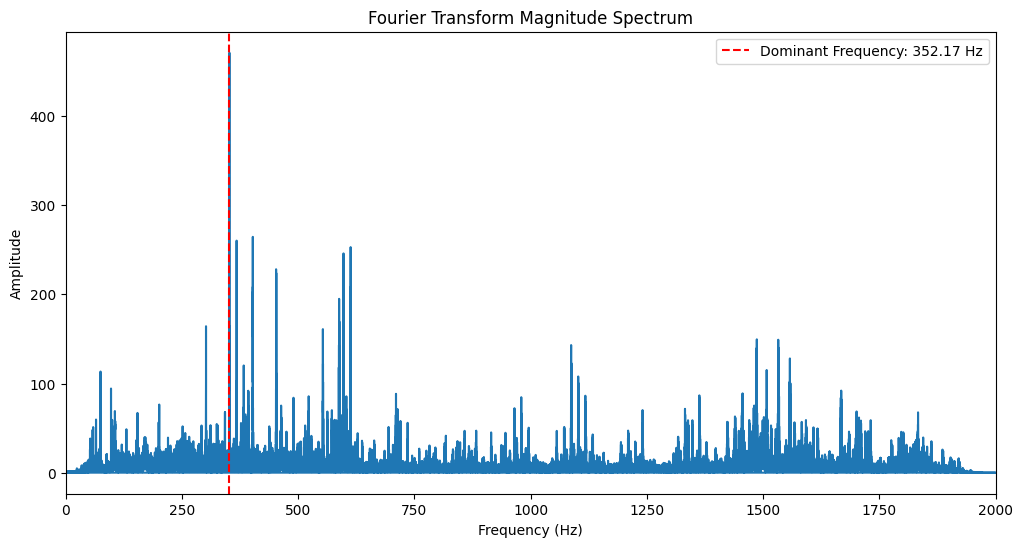

<ipython-input-2-4a019c77e54b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Audio File': audio_file_path, 'Dominant Frequency (Hz)': dominant_frequency}, ignore_index=True)


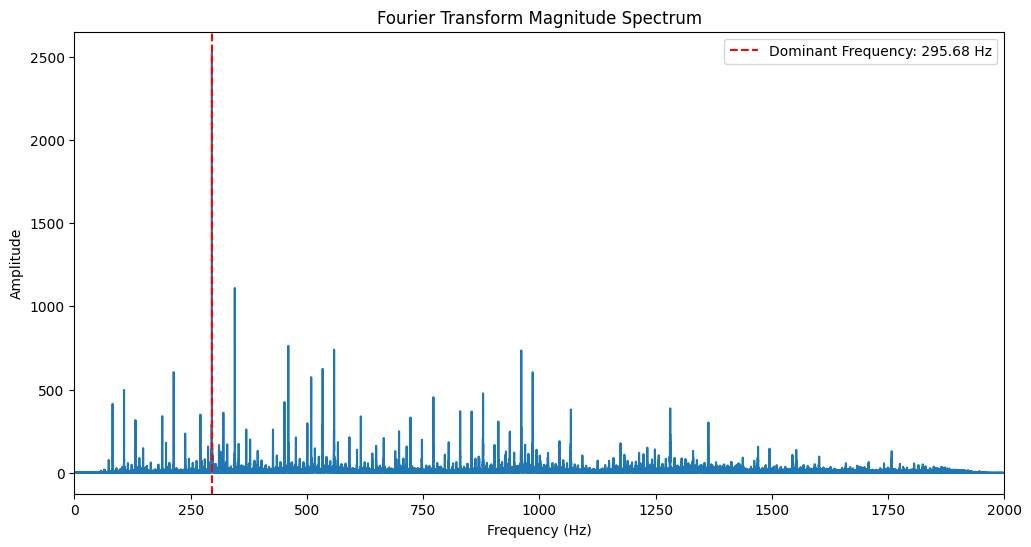

<ipython-input-2-4a019c77e54b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Audio File': audio_file_path, 'Dominant Frequency (Hz)': dominant_frequency}, ignore_index=True)


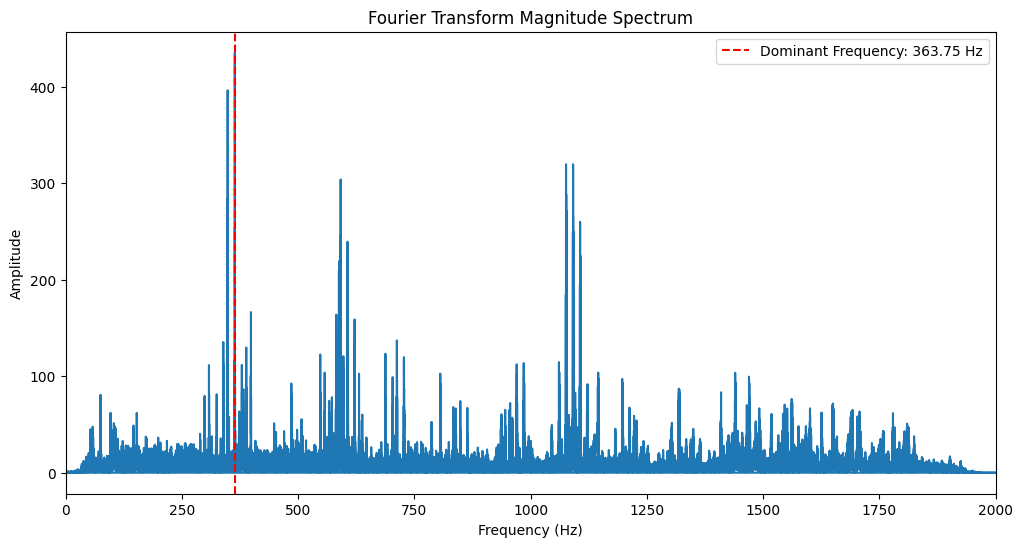

                      Audio File  Dominant Frequency (Hz)
0  /content/2.7 broken table.wav               298.029162
1      /content/3 Amps table.wav               352.171027
2  /content/3.3 broken table.wav               295.680835
3    /content/3.3 Amps table.wav               363.752890


In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# List of audio file paths (replace with your actual file paths)
audio_file_paths = [
    '/content/2.7 broken table.wav',
    '/content/3 Amps table.wav',
    '/content/3.3 broken table.wav',
    '/content/3.3 Amps table.wav'
]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Audio File', 'Dominant Frequency (Hz)'])

for audio_file_path in audio_file_paths:
    # Load an audio file
    y, sr = librosa.load(audio_file_path, sr=4000)

    # Compute the Fourier Transform
    fft_result = np.fft.fft(y)
    fft_freqs = np.fft.fftfreq(len(fft_result), 1/sr)

    # Find the index of the maximum amplitude (excluding the DC component)
    dominant_freq_index = np.argmax(np.abs(fft_result[1:])) + 1

    # Extract the dominant frequency in Hertz
    dominant_frequency = np.abs(fft_freqs[dominant_freq_index])

    # Append the result to the DataFrame
    results_df = results_df.append({'Audio File': audio_file_path, 'Dominant Frequency (Hz)': dominant_frequency}, ignore_index=True)

    # Plot the Fourier Transform magnitude spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(fft_freqs, np.abs(fft_result))
    plt.title('Fourier Transform Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, sr/2])

    # Highlight the dominant frequency
    plt.axvline(dominant_frequency, color='r', linestyle='--', label=f'Dominant Frequency: {dominant_frequency:.2f} Hz')
    plt.legend()

    plt.show()

# Display the results table
print(results_df)


## 3.3 Healthy motor

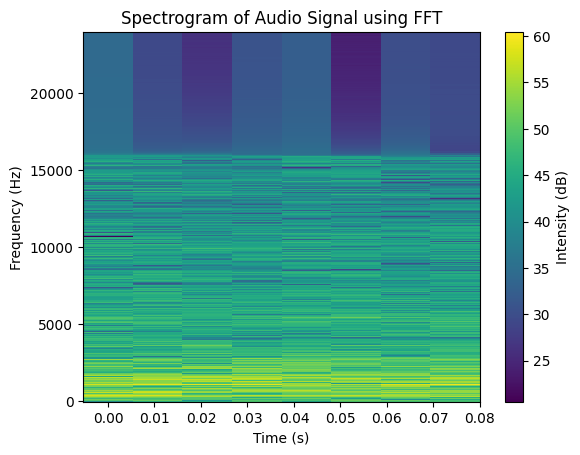

In [ ]:

file_path = '/content/Healthy 3.3_trimmed_center.wav'
sample_rate, audio_data = wavfile.read(file_path)

window_size = 1024
overlap = 512
num_samples = len(audio_data)
num_overlaps = num_samples // overlap - 1
spec_data = np.zeros((window_size, num_overlaps), dtype=complex)

for i in range(num_overlaps):
    start = i * overlap
    end = start + window_size
    segment = audio_data[start:end]
    spec_data[:, i] = np.fft.fft(segment)


frequencies = np.fft.fftfreq(window_size, d=1/sample_rate)[:window_size//2]


times = np.arange(num_overlaps) * overlap / sample_rate


plt.pcolormesh(times, frequencies, 10 * np.log10(np.abs(spec_data[:window_size//2, :])), shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of Audio Signal using FFT')
plt.colorbar(label='Intensity (dB)')
plt.show()


3.3 Broken Motor

<ipython-input-10-01a577f4ed9c>:31: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(np.abs(spec_data[:window_size//2, :])), shading='gouraud')


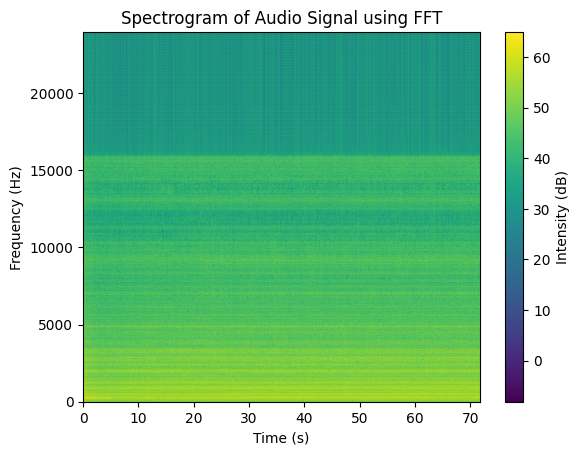

In [ ]:

file_path = '/content/3.3 broken table.wav'
sample_rate, audio_data = wavfile.read(file_path)

window_size = 1024
overlap = 512


num_samples = len(audio_data)
num_overlaps = num_samples // overlap - 1
spec_data = np.zeros((window_size, num_overlaps), dtype=complex)

for i in range(num_overlaps):
    start = i * overlap
    end = start + window_size
    segment = audio_data[start:end]
    spec_data[:, i] = np.fft.fft(segment)


frequencies = np.fft.fftfreq(window_size, d=1/sample_rate)[:window_size//2]


times = np.arange(num_overlaps) * overlap / sample_rate


plt.pcolormesh(times, frequencies, 10 * np.log10(np.abs(spec_data[:window_size//2, :])), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of Audio Signal using FFT')
plt.colorbar(label='Intensity (dB)')
plt.show()